# Advanced Controls Project Compilation
    1. Dimensionality Reduction
    2. Cluster the Data
    3. Label the data by clusters
    4. SVV - find where the labeled data is in fault

# 1 - Dimensionality Reductions

In [123]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read the data
data=pd.read_csv("RawData.csv")
dataLabel = pd.read_csv("RawData_Label.csv")
raw_data = np.array(data)
rawDataLabel = np.array(dataLabel)
label = rawDataLabel[:,1]

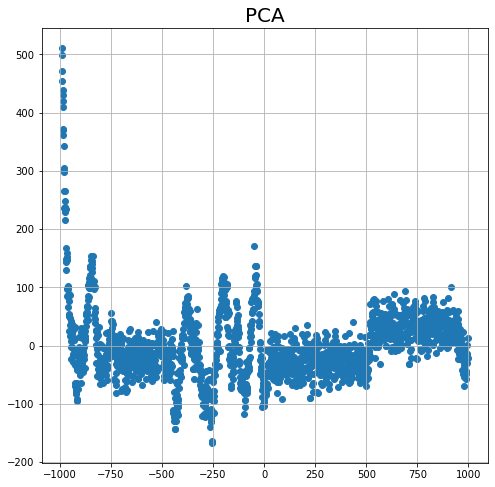

In [127]:
#PCA Dimensionality Reduction-------------------------------------------------------------------------------------------
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
pca = PCA(n_components=2)
projected_PCA = pca.fit_transform(data)


plt.figure(figsize = (8, 8))
scatter = plt.scatter(projected_PCA[:,0], projected_PCA[:,1])
plt.title("PCA", fontsize = 20)
plt.grid()

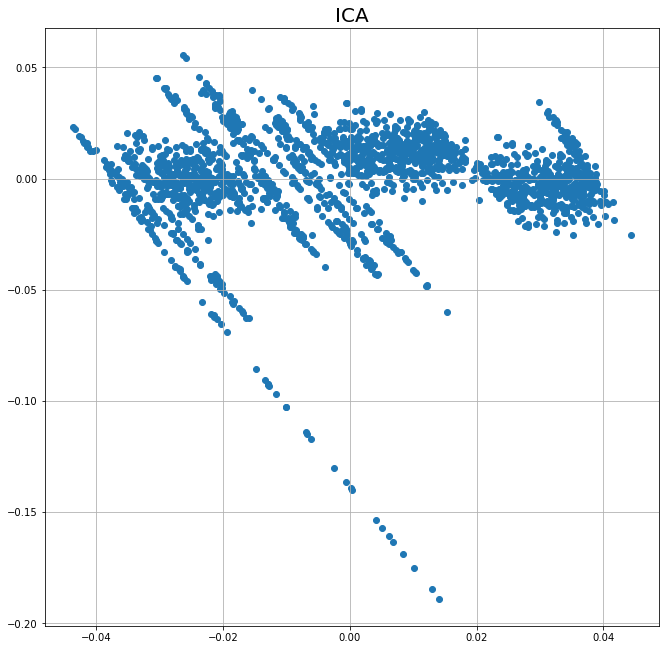

In [128]:
#FastICA Dimensionality Reduction --------------------------------------------------------------------------------------
from sklearn.decomposition import FastICA
import pandas as pd
import numpy as np
ICA = FastICA(n_components=2, random_state=0)
projected_ICA = ICA.fit_transform(data)

import matplotlib.pyplot as plt

plt.figure(figsize = (11, 11))
scatter = plt.scatter(projected_ICA[:,0], projected_ICA[:,1])
plt.title("ICA", fontsize = 20)
plt.grid()

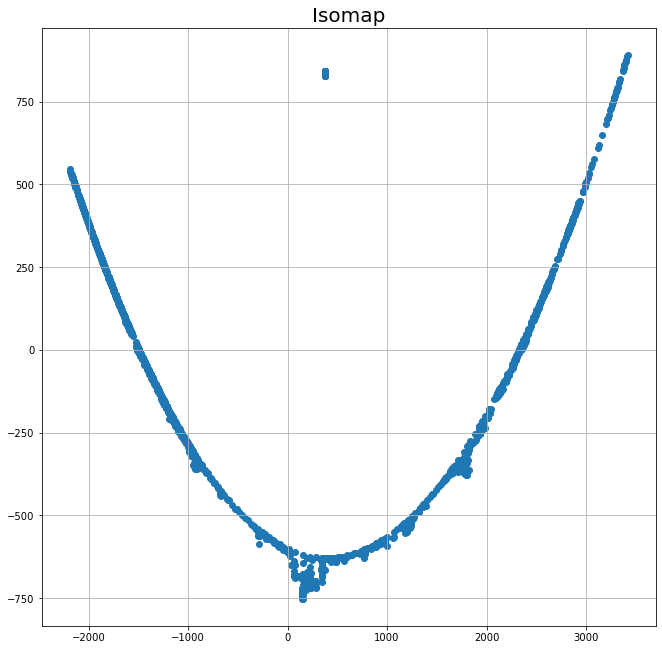

In [129]:
#ISOMAP Dimensionality Reduction---------------------------------------------------------------------------------------
from sklearn.manifold import Isomap
import pandas as pd
import numpy as np
Iso = Isomap(n_components=2)
projected_Isomap = Iso.fit_transform(data)

import matplotlib.pyplot as plt

plt.figure(figsize = (11, 11))
scatter = plt.scatter(projected_Isomap[:,0], projected_Isomap[:,1])
plt.title("Isomap", fontsize = 20)
plt.grid()

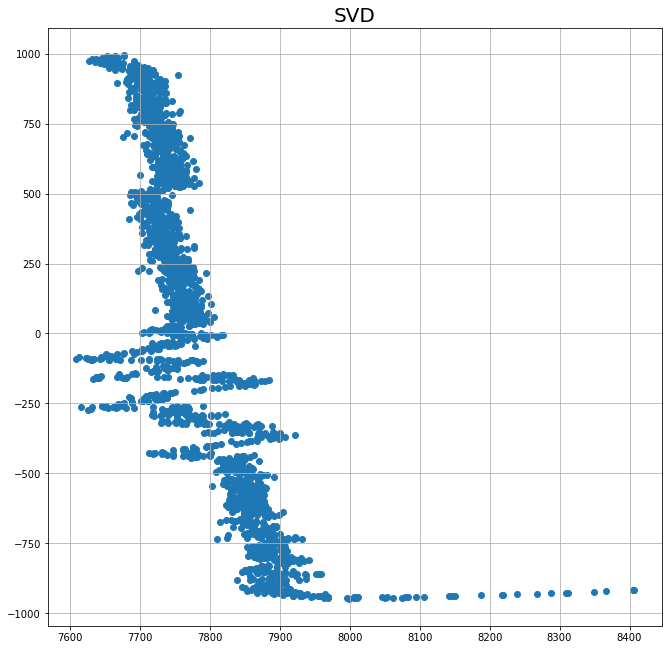

In [130]:
#SVD Dimensionality Reduction------------------------------------------------------------------------------------------
from sklearn.decomposition import TruncatedSVD 
import pandas as pd
import numpy as np
SVD = TruncatedSVD(n_components=2)
projected_SVD = SVD.fit_transform(data)

import matplotlib.pyplot as plt

plt.figure(figsize = (11, 11))
scatter = plt.scatter(projected_SVD[:,0], projected_SVD[:,1])
plt.title("SVD", fontsize = 20)
plt.grid()

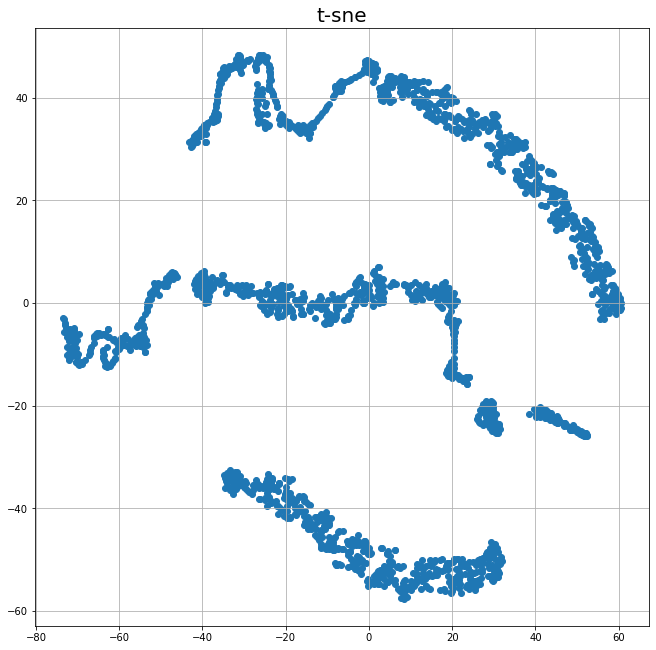

In [131]:
#TSNE Dimensionality Reduction----------------------------------------------------------------------------------------
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
tSNE = TSNE(n_components=2, random_state=0)
projected_TSNE = tSNE.fit_transform(data)

import matplotlib.pyplot as plt

plt.figure(figsize = (11,11))
scatter = plt.scatter(projected_TSNE[:,0], projected_TSNE[:,1])
plt.title("t-sne", fontsize = 20)
plt.grid()

## 2 - Clustring the Data

In [132]:
#DBSCAN Data Clustering-----------------------------------------------------------------------------------------------
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random as rd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score

data=pd.read_csv("RawData.csv")
dataLabel = pd.read_csv("RawData_Label.csv", usecols =['label'])
raw_data = np.array(data)
rawDataLabel = np.array(dataLabel)

scaler = StandardScaler()
scaled = scaler.fit_transform(raw_data)

DBSCAN_cluster = DBSCAN(eps=2.6, min_samples=5).fit(scaled)
DBSCAN_cluster.labels_ 
labels = DBSCAN_cluster.labels_
truelabels=dataLabel.values.flatten()
n_clusters = len(set (labels)) - (1 if -1 in labels else 0)
n_noise_=list(labels).count(-1)


#rand scoring
rand = adjusted_rand_score(truelabels, labels)
print(rand)



0.4675128306003357


In [72]:
#KMeans Data Clustering -----------------------------------------------------------------------------------------------
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random as rd
from sklearn.preprocessing import StandardScaler

data=pd.read_csv("RawData.csv")
dataLabel = pd.read_csv("RawData_Label.csv", usecols =['label'])
raw_data = np.array(data)
rawDataLabel = np.array(dataLabel)

scaler = StandardScaler()
from sklearn.datasets import make_blobs
scaled = scaler.fit_transform(data)

import sys
import numpy
from sklearn.metrics import adjusted_rand_score

#kmeans clustering
kmeans = KMeans (n_clusters=13, random_state=0).fit(scaled)
cluster_array = kmeans.labels_
truelabels=dataLabel.values.flatten()

rand = adjusted_rand_score(truelabels, cluster_array)
print(rand)

0.516041402674847


## 3 - Label the Data by Clusters

In [1]:
#PCA Dimensionality Reduction-------------------------------------------------------------------------------------------
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
pca = PCA(n_components=2)
projected_PCA = pca.fit_transform(data)


plt.figure(figsize = (8, 8))
scatter = plt.scatter(projected_PCA[:,0], projected_PCA[:,1], c=label, cmap= 'gist_rainbow')
plt.legend(*scatter.legend_elements(prop = 'colors'),loc="upper left", title="Digits")
plt.title("PCA", fontsize = 20)
plt.grid()

df = pd.DataFrame(labdata)
labdata = data
df.assign(ClustLabel=label)
df = df.assign(ClustLabel=label)

df.to_csv('C:\Users\ejmcf\Dropbox\LSU\2022 Spring\CHE 4230 Adv Controls\Project\ClusterdData.csv', header=True)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (Temp/ipykernel_19824/706579317.py, line 20)

# 4 - SVV Find where labeled data is in Fault

In [86]:
#data preprocessing

import numpy as np 
import pandas as pd


from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neural_network import MLPClassifier

In [93]:
class DataPreprocessing():
    def __init__(self):
        pass
    
    def readData(self):
        data = pd.read_csv("RawData_Label.csv", header = 0)
        df = pd.DataFrame(data)
        #data = data.to_numpy()
        return data
        
    def split(self, df):
        x = df[df.columns[1:42]]
        y = df[df.columns["label"]]
        
        for i in range(len(y)):
            if y[i] == 1:
                y[i] =0
                
            else:
                y[i] = 1
        scaler = StandardScaler()
        x = scaler.fit_transform(x)
        
        x_test, x_train, y_test, y_train = train_test_split(x, y, test_size = 0.25, shuffle = True)
        
        
        return x_train, x_test, y_train, y_test 
    
    def fault_data(self):
        data = labdata #pd.read_csv("RawData.csv", header = 0)
        #data = data.to_numpy()
        df = pd.DataFrame(labdata)
        
        return data

    def split_fault(self, df):
        xf = df[df.columns[1:42]]
        yf = df[df.columns["ClustLabel"]]
        
        for j in range(len(yf)):
            if yf[j] == 1:
                yf[j] =0
                
            else:
                yf[j] = 1
        scaler = StandardScaler()
        xf = scaler.fit_transform(xf)
        
        x_testf, x_trainf, y_testf, y_trainf = train_test_split(xf, yf, test_size = 0.25, shuffle = True)
        
        return x_trainf, x_testf, y_trainf, y_testf  
    

In [95]:
clf = svm.SVC(C=1.0, kernel = "linear")
#clf.fit(x_train, y_train)

preprocess = DataPreprocessing()
faultdata = preprocess.fault_data()
x_trainf, x_testf, y_trainf, y_testf = preprocess.split_fault(labdata)

xf = x_trainf
yf = y_trainf

clf.fit(xf, yf)

y_predf = clf.predict(x_testf)

check = accuracy_score(y_testf, y_predf)
print("SVM Acuuracy = ", check)

classifier=MLPClassifier (hidden_layer_sizes= (150,100,50) ,max_iter=300, activation='relu', solver= 'adam', random_state=1)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_trainf)
score2 = accuracy_score (y_trainf,y_pred)
print ("ANN Accuracy. =",score2)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

# 3 - Clustering the Data

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data

sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds={'alpha' : 0.5, 'sss' : 80, 'linewidths' :0}

data=pd.read_csv("RawData.csv")
df = pd.DataFrame(data)
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as PCA
from sklearn.datasets import load_digits


import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pcadigits = pca.fit_transform(df)
print('Original dimensions', df.shape[1])
print('Reduced dimensions',pcadigits.shape[1])

Original dimensions 54
Reduced dimensions 2


In [156]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data

wget.download('https://github.com/scikit-learn-contrib/hdbscan/archive/master.zip')
unzip master.zip
rm master.zip
cd hdbscan-master


clusterer= hdbscan.HDBSCAN(min_cluster_size=10, gen_min_span_tree=True)
clusterer.fit(pcadigits)

SyntaxError: invalid syntax (Temp/ipykernel_14840/2641655363.py, line 7)